## Used Packages

matplotlib : 시각화를 위한 그래프 라이브러리
      graph library for visualization


numpy(numerical python) : 선형대수(배열,행렬) 연산에 효과적인 라이브러리
      An effective library for linear algebra(arrays, matrices)


pandas : 구조화된 데이터를 가공하는데 효과적인 라이브러리 (dataframe)
      An effective library for structured data processing


scikit-learn : 데이터 분석을 위한 라이브러리 (numpy, scipy, matplotlib 기반)
      library for data analysis

pydpc : Density peaks Clustering을 위한 라이브러리
      Clustering by fast search and find of density peaks

## K-means Clustering

Iris 데이터

종속변수(dependent variable) : 꽃의 종(Setosa, Versicolour, and Virginica)

독립변수(independent variable) :  4가지 변수 (Sepal Length, Sepal Width, Petal.Length, Petal.Width)

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [2]:
feature = data[ ['Sepal length','Sepal width']]
feature

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
labels = model.labels_

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)


     Sepal length  Sepal width  predict
0             5.1          3.5        2
1             4.9          3.0        2
2             4.7          3.2        2
3             4.6          3.1        2
4             5.0          3.6        2
5             5.4          3.9        2
6             4.6          3.4        2
7             5.0          3.4        2
8             4.4          2.9        2
9             4.9          3.1        2
10            5.4          3.7        2
11            4.8          3.4        2
12            4.8          3.0        2
13            4.3          3.0        2
14            5.8          4.0        2
15            5.7          4.4        2
16            5.4          3.9        2
17            5.1          3.5        2
18            5.7          3.8        2
19            5.1          3.8        2
20            5.4          3.4        2
21            5.1          3.7        2
22            4.6          3.6        2
23            5.1          3.3        2


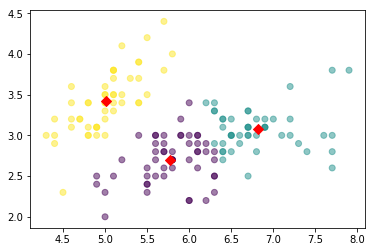

In [4]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [5]:
from sklearn import metrics
metrics.silhouette_score(feature, labels, metric='euclidean')

0.44346932312451259

## Affinity Propagation Clustering

### 데이터 생성 후 Clustering 

make_blobs : Generate isotropic Gaussian blobs for clustering.

Automatically created module for IPython interactive environment
Silhouette Coefficient: 0.753


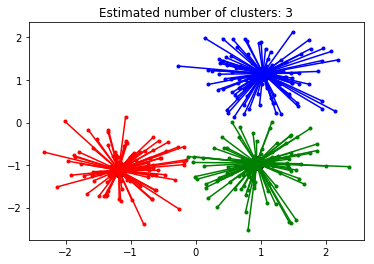

In [6]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Iris Data 사용

In [7]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs


# Compute Affinity Propagation
af = AffinityPropagation(preference=-15)
af.fit(feature)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

predict = pd.DataFrame(af.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)


Automatically created module for IPython interactive environment
     Sepal length  Sepal width  predict
0             5.1          3.5        0
1             4.9          3.0        0
2             4.7          3.2        0
3             4.6          3.1        0
4             5.0          3.6        0
5             5.4          3.9        0
6             4.6          3.4        0
7             5.0          3.4        0
8             4.4          2.9        0
9             4.9          3.1        0
10            5.4          3.7        0
11            4.8          3.4        0
12            4.8          3.0        0
13            4.3          3.0        0
14            5.8          4.0        0
15            5.7          4.4        0
16            5.4          3.9        0
17            5.1          3.5        0
18            5.7          3.8        0
19            5.1          3.8        0
20            5.4          3.4        0
21            5.1          3.7        0
22            4

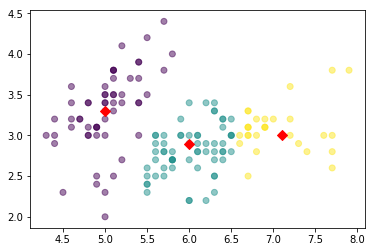

In [8]:
centers = pd.DataFrame(af.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [9]:
metrics.silhouette_score(feature, labels, metric='euclidean')

0.42803145240315654

# Density Peak Clustering

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pydpc import Cluster
from pydpc._reference import Cluster as RefCluster

In [11]:
import numpy as np

np_feature = np.array(feature)
np_feature = np_feature + np.random.normal(0,0.0001, np_feature.shape)

np_feature


array([[ 5.09994845,  3.5000304 ],
       [ 4.90014158,  3.00007604],
       [ 4.69998812,  3.19997958],
       [ 4.60015862,  3.10004815],
       [ 4.99982638,  3.60007384],
       [ 5.39991899,  3.90002602],
       [ 4.60015361,  3.40001432],
       [ 5.00023316,  3.40009806],
       [ 4.40004364,  2.89984332],
       [ 4.90006106,  3.0998718 ],
       [ 5.40003295,  3.70009408],
       [ 4.80023911,  3.40013862],
       [ 4.80005069,  3.00011542],
       [ 4.30008227,  3.00007779],
       [ 5.80002376,  4.00005949],
       [ 5.69987979,  4.40004098],
       [ 5.39997729,  3.89977821],
       [ 5.09990834,  3.49991938],
       [ 5.70015934,  3.79995773],
       [ 5.10006162,  3.80003805],
       [ 5.39991958,  3.39995951],
       [ 5.10010278,  3.69986584],
       [ 4.59993465,  3.60013702],
       [ 5.09992422,  3.30018342],
       [ 4.80000192,  3.39993751],
       [ 4.99995734,  3.00000436],
       [ 5.00008299,  3.40007061],
       [ 5.19996486,  3.4998807 ],
       [ 5.20000721,

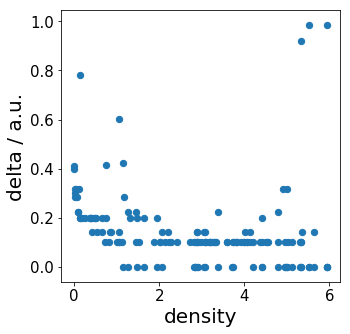

In [12]:
clu = Cluster(np_feature)

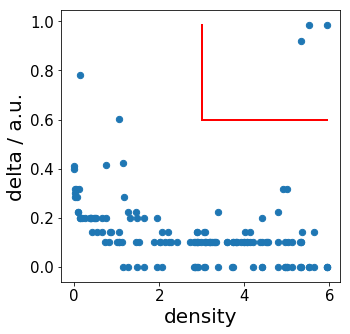

In [13]:
clu.assign(3, 0.6)

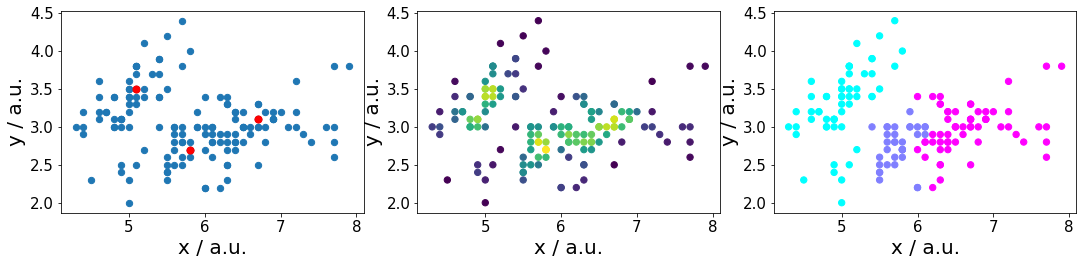

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(np_feature[:, 0], np_feature[:, 1], s=40)
ax[0].scatter(np_feature[clu.clusters, 0], np_feature[clu.clusters, 1], s=50, c="red")
ax[1].scatter(np_feature[:, 0], np_feature[:, 1], s=40, c=clu.density)
ax[2].scatter(np_feature[:, 0], np_feature[:, 1], s=40, c=clu.membership, cmap=mpl.cm.cool)
for _ax in ax:
   
    _ax.set_xlabel(r"x / a.u.", fontsize=20)
    _ax.set_ylabel(r"y / a.u.", fontsize=20)
    _ax.tick_params(labelsize=15)
   
    _ax.set_aspect('equal')
fig.tight_layout()

## Iris 4

Iris data의 변수 4가지를 모두 사용

In [15]:
feature4 = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature4

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature4)
predict = pd.DataFrame(model.predict(feature4))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature4,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
5             5.4          3.9           1.7          0.4        1
6             4.6          3.4           1.4          0.3        1
7             5.0          3.4           1.5          0.2        1
8             4.4          2.9           1.4          0.2        1
9             4.9          3.1           1.5          0.1        1
10            5.4          3.7           1.5          0.2        1
11            4.8          3.4           1.6          0.2        1
12            4.8          3.0           1.4          0.1        1
13            4.3          3.0           1.1          0.1     

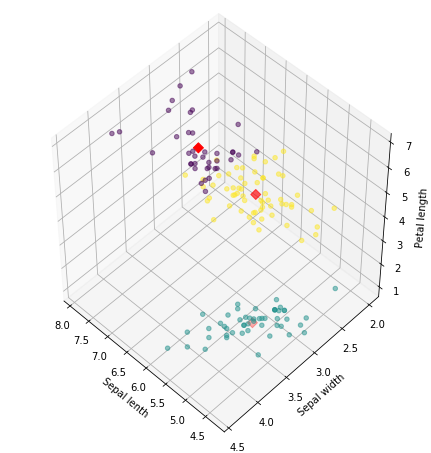

In [17]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width','Petal length','Petal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
center_z = centers['Petal length']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()